In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('/Users/deeps/Downloads/creditcard.csv')

In [6]:
df.shape

(284807, 31)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<!--
This dataset contains anonymized credit card transactions labeled as fraudulent or not.

Column	Description
Time	Seconds elapsed between the transaction and the first transaction in the dataset
V1-V28	Principal components from PCA (transformed features) to anonymize the original data
Amount	The transaction amount (in real value)
Class	Target variable: 0 = non-fraud, 1 = fraud

🧠 What’s Up With V1 to V28?
- These are PCA-transformed features. PCA (Principal Component Analysis) was used to:
- Remove sensitive information (like name, card number, merchant, etc.)
- Reduce dimensionality
- Keep the dataset usable while preserving privacy
- So we don’t know exactly what each V column represents, but they still capture important patterns.

💡 What Columns Are Useful for EDA?
Column	Usefulness in EDA
Time	YES — can convert to hour of day, day, or time bins to see fraud timing patterns
Amount	YES — analyze fraud vs. non-fraud by transaction size
Class	YES — used to filter/group transactions
V1–V28	MAYBE — use for correlation analysis, distribution comparison between fraud/non-fraud
>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
df['Time'].max()

np.float64(172792.0)

In [9]:
#helps to know hour of transaction
df['Hour'] = (df['Time'] // 3600) % 24


In [23]:
df['Amount'].value_counts()

Amount
1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
202.24        1
252.85        1
615.52        1
180.93        1
807.48        1
Name: count, Length: 32767, dtype: int64

In [10]:
df['AmountBin'] = pd.cut(df['Amount'],
                         bins=[0, 10, 100, 500, 1000, df['Amount'].max()],
                         labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],include_lowest=True) #inculde lowest to traet 0.00  values as very low not as nan 


In [25]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,AmountBin
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,Medium
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,Very Low
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,Medium
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,Medium
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,Low


In [26]:
df.isnull().sum()

Time         0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
Amount       0
Class        0
Hour         0
AmountBin    0
dtype: int64

# EDA


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


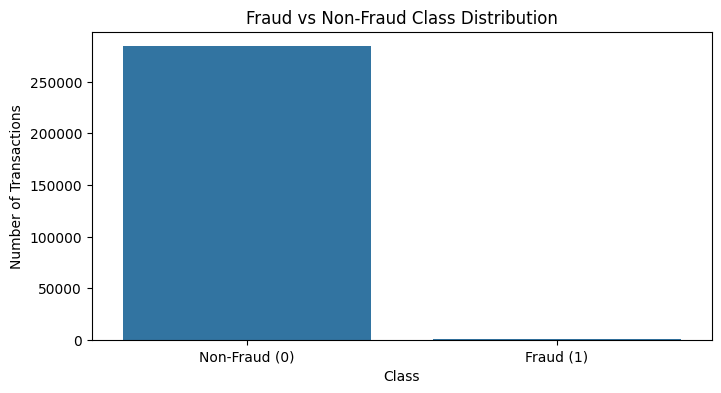

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of fraud and non-fraud
class_counts = df['Class'].value_counts()

print("Class distribution:\n", class_counts)

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.title('Fraud vs Non-Fraud Class Distribution')
plt.show()


**-The dataset is extremely imbalanced.**

**-Only about 0.17% of all transactions are fraudulent.**

**-This makes it challenging to detect fraud, which is why fraud detection is so valuable in real life**

In [13]:
fraud_rate = (df['Class'].value_counts(normalize=True)[1]) * 100
print(f"Fraudulent transactions: {fraud_rate:.4f}% of all data")


Fraudulent transactions: 0.1727% of all data


**Only 0.17% of transactions are fraudulent. This extreme imbalance highlights the difficulty of fraud detection and the need for strong data analysis and visual storytelling to surface potential patterns.**

In [14]:
df.groupby('Class')['Amount'].describe()


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


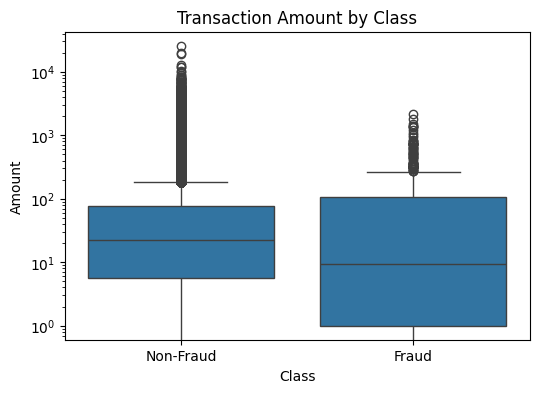

In [36]:
#amount-fraud 
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.title('Transaction Amount by Class')
plt.yscale('log')  # log scale helps if there are extreme outliers
plt.show()


**While both fraudulent and non-fraudulent transactions span a wide range of amounts, the median amount for fraud is notably lower than for non-fraud. This suggests that fraudulent activity often involves smaller transactions, potentially to avoid detection. However, a few high-value fraud outliers exist highlighting occasional large-scale fraud attempts**

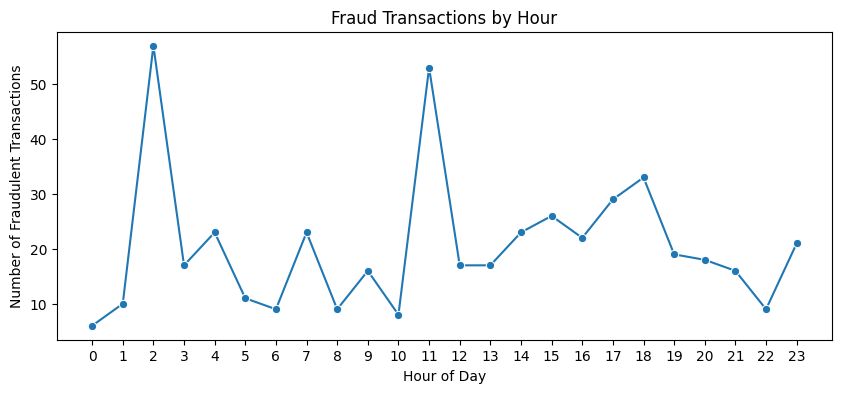

In [44]:
# hour-fraud

# Count of frauds per hour
fraud_by_hour = df[df['Class'] == 1]['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o')
plt.xticks(range(24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraud Transactions by Hour')
plt.show()


**Fraudulent transactions show clear time-based patterns, with noticeable spikes around 2 AM and 11 AM. This suggests that fraudsters may be targeting off-peak hours, potentially to avoid detection when human or system monitoring is reduced. Evening hours also show moderate fraud activity, possibly designed to blend in with legitimate user behavior. Such insights are valuable for optimizing fraud detection systems to monitor more aggressively during vulnerable time windows.**

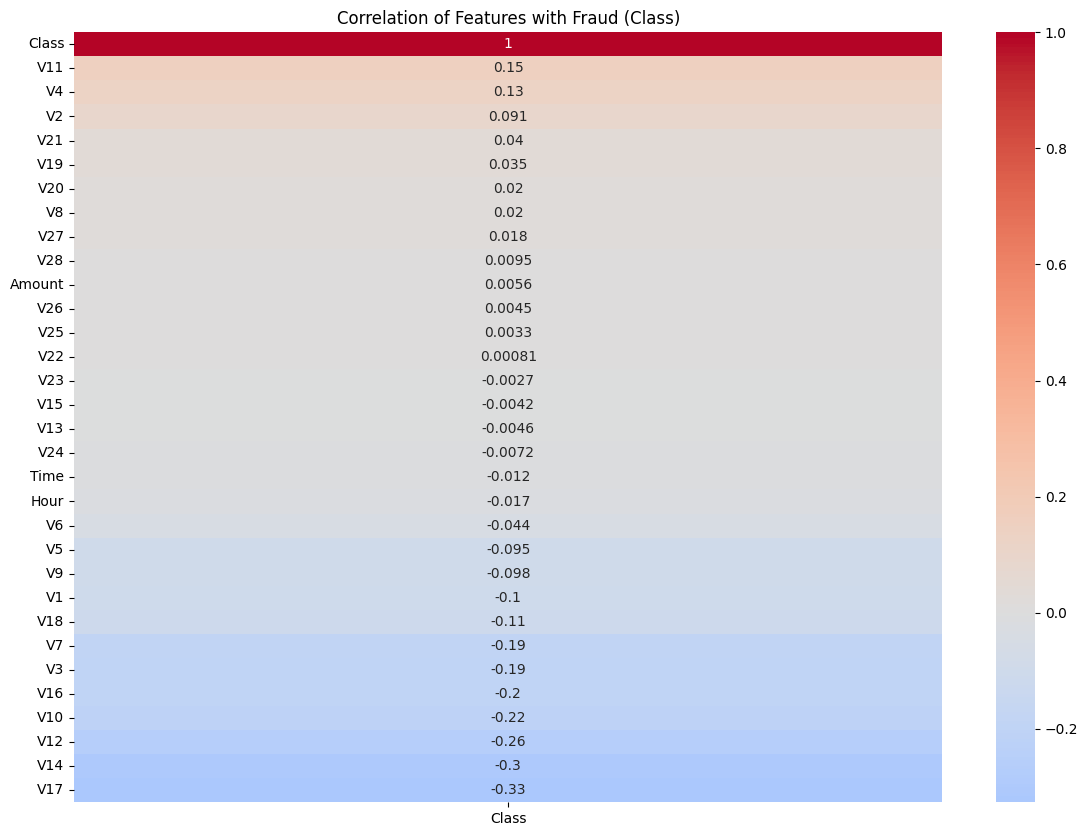

In [15]:
# Correlation matrix
corr = df.select_dtypes(include='number').corr()


plt.figure(figsize=(14, 10))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Features with Fraud (Class)')
plt.show() 




**So a positive correlation (e.g., 0.15) means**
**As the value of V11 increases, the likelihood of the transaction being fraud also increases**

In [19]:
#saving correlation output csv to use it in tableau
# ✅ Keep only numeric columns (important!)
numeric_df = df.select_dtypes(include='number')

# ✅ Extract correlations directly with 'Class'
class_corr = numeric_df.corrwith(df['Class']).sort_values(ascending=False)

# Convert to DataFrame
class_corr = class_corr.reset_index()
class_corr.columns = ['Feature', 'Correlation_with_Class']

# Drop the 'Class' row itself (self-correlation = 1.0)
class_corr = class_corr[class_corr['Feature'] != 'Class']

# Save to CSV
class_corr.to_csv("/Users/deeps/Downloads/feature_correlations.csv", index=False)


In [53]:
df.to_csv('/Users/deeps/Downloads/cleaned_fraud_data.csv', index=False)
